In [2]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.shape

(440, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

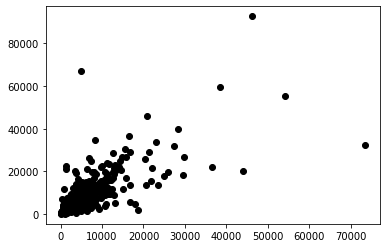

In [8]:
X = data[["Milk","Grocery"]]
#Visualise data points
plt.scatter(X["Milk"],X["Grocery"],c='black')

plt.show()

####  Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster
####  Step 3 - Assign all the points to the closest cluster centroid
####  Step 4 - Recompute centroids of newly formed clusters
####  Step 5 - Repeat step 3 and 4

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_data = sc.fit_transform(data)

In [10]:
from sklearn.cluster import KMeans
kmean = KMeans()
kmean.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
Centroids = kmean.cluster_centers_

In [13]:
df_Centroid = pd.DataFrame(Centroids)

In [14]:
df_Centroid

,0,1,2,3,4,5,6,7
0,1.058065,2.503226,4924.651613,2514.722581,3055.161290,2587.645161,822.412903,833.045161
1,2.000000,2.800000,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000
2,1.136364,2.659091,32837.522727,4951.022727,5582.090909,4236.727273,955.227273,1956.295455
3,1.793103,2.586207,4443.229885,8716.586207,12616.689655,1456.172414,5391.333333,1512.425287
4,2.000000,2.433333,6683.066667,17468.033333,26658.933333,1986.300000,11872.900000,2531.200000
5,1.000000,2.428571,68409.714286,7298.857143,8161.000000,11348.428571,1409.428571,3061.000000
6,1.000000,2.500000,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000
7,1.209091,2.545455,16440.536364,3011.063636,4397.236364,3525.918182,1017.018182,1451.854545


Text(0, 0.5, 'Inertia')

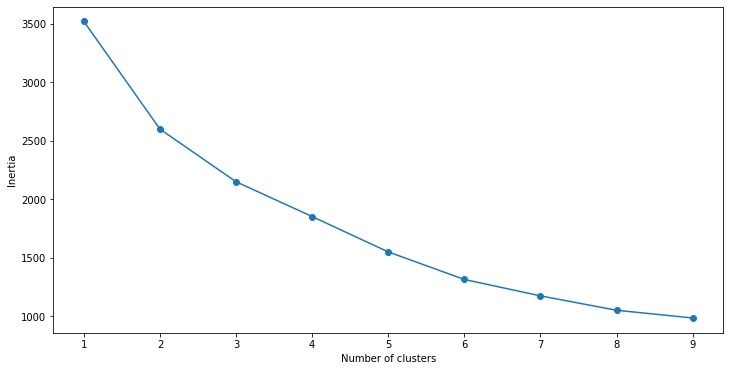

In [17]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(std_data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [19]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(std_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
kmeans.labels_

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 2, 0, 0, 3, 2, 0, 0, 2, 3, 2, 2, 0, 3,
       0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 3, 3, 1,
       0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2,

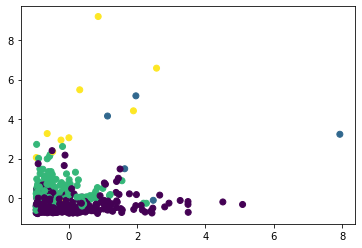

In [23]:
plt.scatter(std_data[:,2], std_data[:,3], c=kmeans.labels_)
plt.show()

In [37]:
data_scaled

array([[ 8.12575187e-01,  7.07468765e-01],
       [-1.37659578e+00, -4.08932206e-01],
       [ 5.30101514e-01, -7.03018880e-01],
       [ 1.27159491e+00,  1.70679926e+00],
       [-3.52628717e-01, -8.79329836e-01],
       [-1.23535895e+00, -2.67883442e-01],
       [ 1.41700212e-01, -7.61554118e-01],
       [ 3.18246258e-01, -1.21784687e+00],
       [-3.10674704e+00, -1.60855195e+00],
       [ 7.06647560e-01,  9.66293248e-01],
       [-1.76082671e-01,  1.13931122e-02],
       [-1.02350369e+00, -4.92578566e-02],
       [ 9.89121233e-01,  9.21862887e-01],
       [ 3.53555468e-01, -6.91029735e-01],
       [-3.48458338e-02,  2.87750401e+00],
       [ 3.88864677e-01, -6.91029735e-01],
       [ 2.47627840e-01, -1.51518211e-01],
       [ 6.00719932e-01, -5.50686215e-01],
       [ 1.77009422e-01,  4.55696721e-01],
       [-2.47118127e+00, -1.50770208e+00],
       [ 5.30101514e-01,  1.20000661e-01],
       [-1.09412211e+00, -2.91156488e-01],
       [ 3.57725847e-02,  7.84340342e-01],
       [ 3.

In [38]:
result = pd.DataFrame(X,columns= ["ApplicantIncome","LoanAmount"])

In [39]:
result["LoanApproval"] = target

In [40]:
result

,ApplicantIncome,LoanAmount,LoanApproval
0,4583,128.0,0
1,3000,66.0,1
2,2583,120.0,0
3,6000,141.0,0
4,2333,95.0,1
5,3200,70.0,1
6,2500,109.0,1
7,1853,114.0,1
8,1299,17.0,1
9,4950,125.0,0


In [27]:
train = pd.read_csv("loan.csv")

In [28]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [29]:
train.shape

(381, 13)

In [30]:
train.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
X = train[["LoanAmount","ApplicantIncome"]]

In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [34]:
kmean = KMeans(n_clusters=2)
kmean.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
train.Loan_Status = train.Loan_Status.apply(lambda x: 0 if x=="Y" else 1)

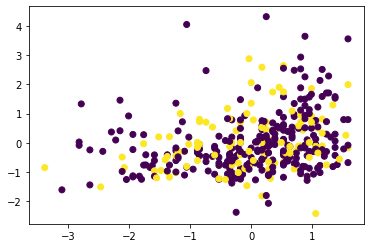

In [36]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=train.Loan_Status)

In [38]:
kmean.labels_

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

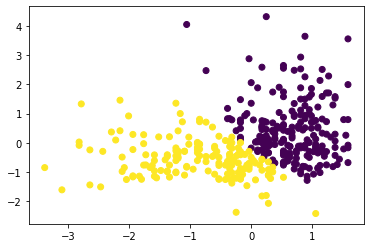

In [37]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmean.labels_)

In [39]:
data = kmean.transform(scaled_data)

In [40]:
kmean.labels_

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [41]:
kmean.cluster_centers_

array([[ 0.66176856,  0.44022749],
       [-0.84801481, -0.56412385]])

In [43]:
result = pd.DataFrame(data,columns=["LoanAmount","ApplicantIncome"])
result["Predicted_Loan_Status"] = kmean.labels_

In [44]:
result["Original_Loan_Status"] = train["Loan_Status"]

In [45]:
result

,LoanAmount,ApplicantIncome,Predicted_Loan_Status,Original_Loan_Status
0,0.306856,2.091532,0,1
1,2.208167,0.550892,1,0
2,1.150803,1.385098,0,0
3,1.405735,3.106419,0,0
4,1.664402,0.587165,1,0
5,2.024973,0.487641,1,0
6,1.309485,1.009215,1,0
7,1.693286,1.336981,1,1
8,4.289430,2.488514,1,0
9,0.527977,2.181548,0,0
